In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Set dataset path
dataset_path = "Participants_Data_TGIH\Participants_Data_TGIH\Train.csv"

# Read csv into pandas dataframe
train_data = pd.read_csv(dataset_path)

# print top 5 rows
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
# Convert invoice date into epoch timestamps
train_data['InvoiceDate'] = pd.to_datetime(train_data['InvoiceDate'])
train_data['timestamp'] = ((train_data['InvoiceDate'] - dt.datetime(1970,1,1)).dt.total_seconds())/(10**6)
train_data.drop(columns=["InvoiceDate"], inplace=True)
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
0,6141,1583,144,3,3.75,14056.0,35,1304.70084
1,6349,1300,3682,6,1.95,13098.0,35,1305.09930
2,16783,2178,1939,4,5.95,15044.0,35,1321.79520
3,16971,2115,2983,1,0.83,15525.0,35,1321.96362
4,6080,1210,2886,12,1.65,13952.0,35,1304.67240


In [4]:
train_data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846,1310.330343
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602,9.748515
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000,1291.191960
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000,1302.174960
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,1312.114080
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,1319.118840
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000,1323.435000


[Text(0, 0.5, 'UnitPrice'), Text(0.5, 0, 'timestamp')]

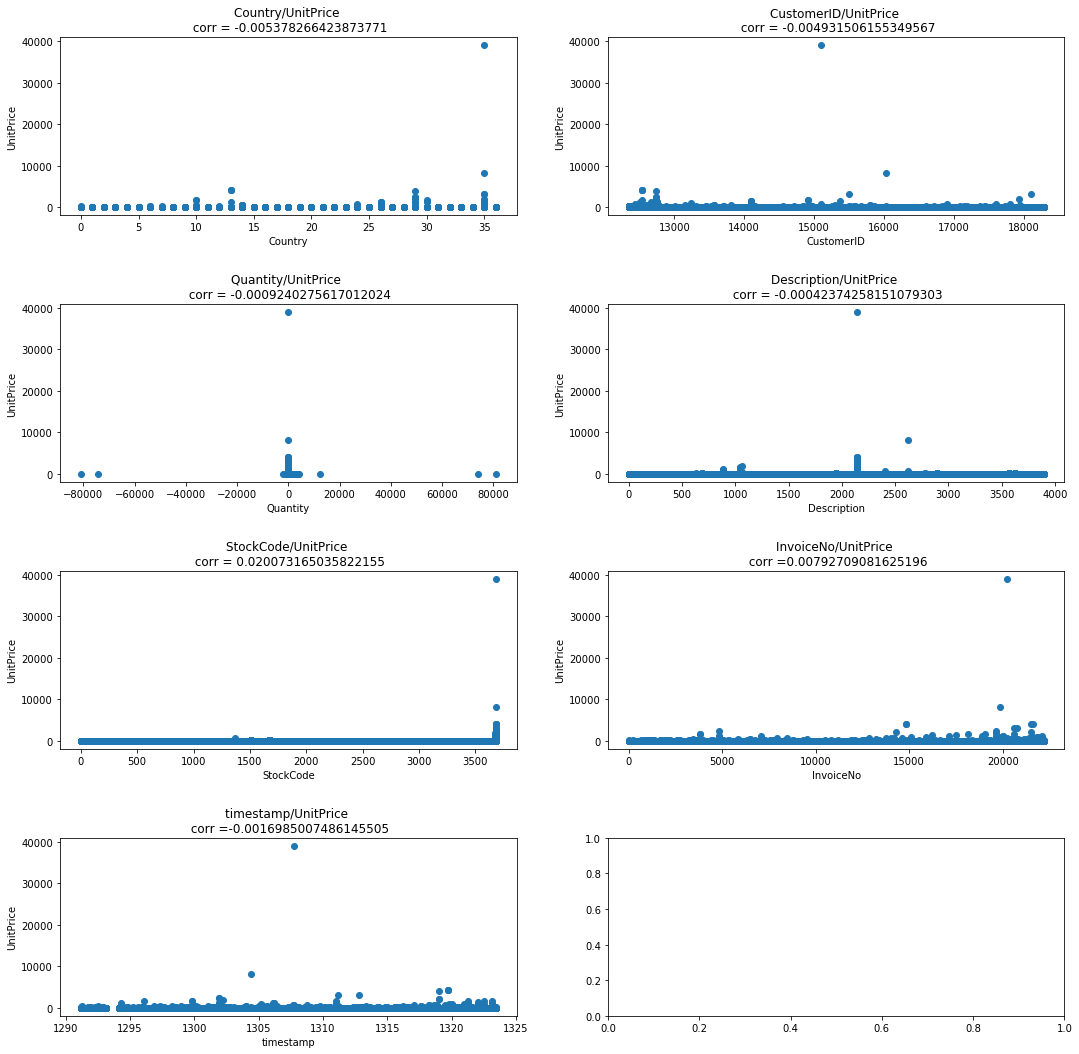

In [5]:
# plot scatter diagrams of all other variables in realtion with unitPrice to find out any outliers
fig, axs = plt.subplots(4, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)

# Plot for Country vs UnitPrice
axs[0, 0].scatter(train_data["Country"], train_data["UnitPrice"])
axs[0, 0].set_title('Country/UnitPrice \n corr = {}'.format(pearsonr(train_data["Country"],train_data["UnitPrice"])[0]))
axs[0, 0].set(xlabel='Country', ylabel='UnitPrice')

# Plot for CustomerID vs UnitPrice
axs[0, 1].scatter(train_data["CustomerID"], train_data["UnitPrice"])
axs[0, 1].set_title('CustomerID/UnitPrice \n corr = {}'.format(pearsonr(train_data["CustomerID"],train_data["UnitPrice"])[0]))
axs[0, 1].set(xlabel='CustomerID', ylabel='UnitPrice')

# Plot for Quantity vs UnitPrice
axs[1, 0].scatter(train_data["Quantity"], train_data["UnitPrice"])
axs[1, 0].set_title('Quantity/UnitPrice \n corr = {}'.format(pearsonr(train_data["Quantity"],train_data["UnitPrice"])[0]))
axs[1, 0].set(xlabel='Quantity', ylabel='UnitPrice')

# Plot for Discription vs UnitPrice
axs[1, 1].scatter(train_data["Description"], train_data["UnitPrice"])
axs[1, 1].set_title('Description/UnitPrice \n corr = {}'.format(pearsonr(train_data["Description"],train_data["UnitPrice"])[0]))
axs[1, 1].set(xlabel='Description', ylabel='UnitPrice')

# Plot for StockCode vs UnitPrice
axs[2, 0].scatter(train_data["StockCode"], train_data["UnitPrice"])
axs[2, 0].set_title('StockCode/UnitPrice \n corr = {}'.format(pearsonr(train_data["StockCode"],train_data["UnitPrice"])[0]))
axs[2, 0].set(xlabel='StockCode', ylabel='UnitPrice')

# Plot for InvoiceNo vs UnitPrice
axs[2, 1].scatter(train_data["InvoiceNo"], train_data["UnitPrice"])
axs[2, 1].set_title('InvoiceNo/UnitPrice \n corr ={}'.format(pearsonr(train_data["InvoiceNo"],train_data["UnitPrice"])[0]))
axs[2, 1].set(xlabel='InvoiceNo', ylabel='UnitPrice')

# Plot for timestamp vs UnitPrice
axs[3, 0].scatter(train_data["timestamp"], train_data["UnitPrice"])
axs[3, 0].set_title('timestamp/UnitPrice \n corr ={}'.format(pearsonr(train_data["timestamp"],train_data["UnitPrice"])[0]))
axs[3, 0].set(xlabel='timestamp', ylabel='UnitPrice')

In [6]:
# saving Correlation for later comparision
correlations = train_data.corrwith(train_data["UnitPrice"],method='pearson').to_frame(name="correlation with UnitPrice Before")

## Some key points to note based on above charts
* first, quantity seem to be symmetric for its min and max 2 values. Need further investigation
* Surprisingly, Quantity have lowest pearson correaltion coeffiecient with unitPrice
* There are very few outliers in each for each chart specifically those two data points are very farther than rest of the data. So, we will get rid of those data-points because this might affect model test accuacy

## Investigating Qunatity column outliers

In [7]:
# Investigating Quantity
outliers = train_data[train_data['Quantity'] <= -20000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
180978,22185,2403,2329,-80995,2.080000,16446.000000,35,1323.422820
271013,18958,2001,2002,-74215,1.040000,12346.000000,35,1295.345820


In [8]:
outliers = train_data[train_data['Quantity'] >= 20000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
141379,1909,2001,2002,74215,1.040000,12346.000000,35,1295.344860
210734,18503,2403,2329,80995,2.080000,16446.000000,35,1323.422100


* Excatly as I suspected this two data point are very far and symetrical for UnitPrice
* So, I decided to drop this 4 entries

In [9]:
# Deleting all the Rows

print("rows before dropping the rows {}".format(len((train_data.index))))
print("Correlation before dropping the rows", pearsonr(train_data["Quantity"],train_data["UnitPrice"])[0])

train_data.drop(train_data[train_data['Quantity'] <= -20000].index, inplace=True) 
train_data.drop(train_data[train_data['Quantity'] >= 20000].index, inplace=True) 

print("\nrows before dropping the rows {}".format(len((train_data.index))))
print("Correlation After dropping the rows", pearsonr(train_data["Quantity"],train_data["UnitPrice"])[0])

rows before dropping the rows 284780
Correlation before dropping the rows -0.0009240275617012024

rows before dropping the rows 284776
Correlation After dropping the rows -0.005640884500777312


## Investigating UnitPrice Column outliers

In [10]:
# Cleaning outlying data points
outliers = train_data[train_data['UnitPrice']>=5000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
140723,20237,3681,2140,-1,38970.000000,15098.000000,35,1307.719860
239556,19848,3683,2624,-1,8142.750000,16029.000000,35,1304.427060


* Yes! there are only 2 data points having UnitPrice above 5000
* Let's drop 'em

In [11]:
print("rows before dropping the rows {}".format(len((train_data.index))))
train_data.drop(train_data[train_data['UnitPrice'] >= 5000].index, inplace = True) 
print("rows after dropping the rows {}".format(len((train_data.index))))

rows before dropping the rows 284776
rows after dropping the rows 284774


# Let's see how the correlation is improved after cleaning data
* plotting chaarts again

[Text(0, 0.5, 'UnitPrice'), Text(0.5, 0, 'timestamp')]

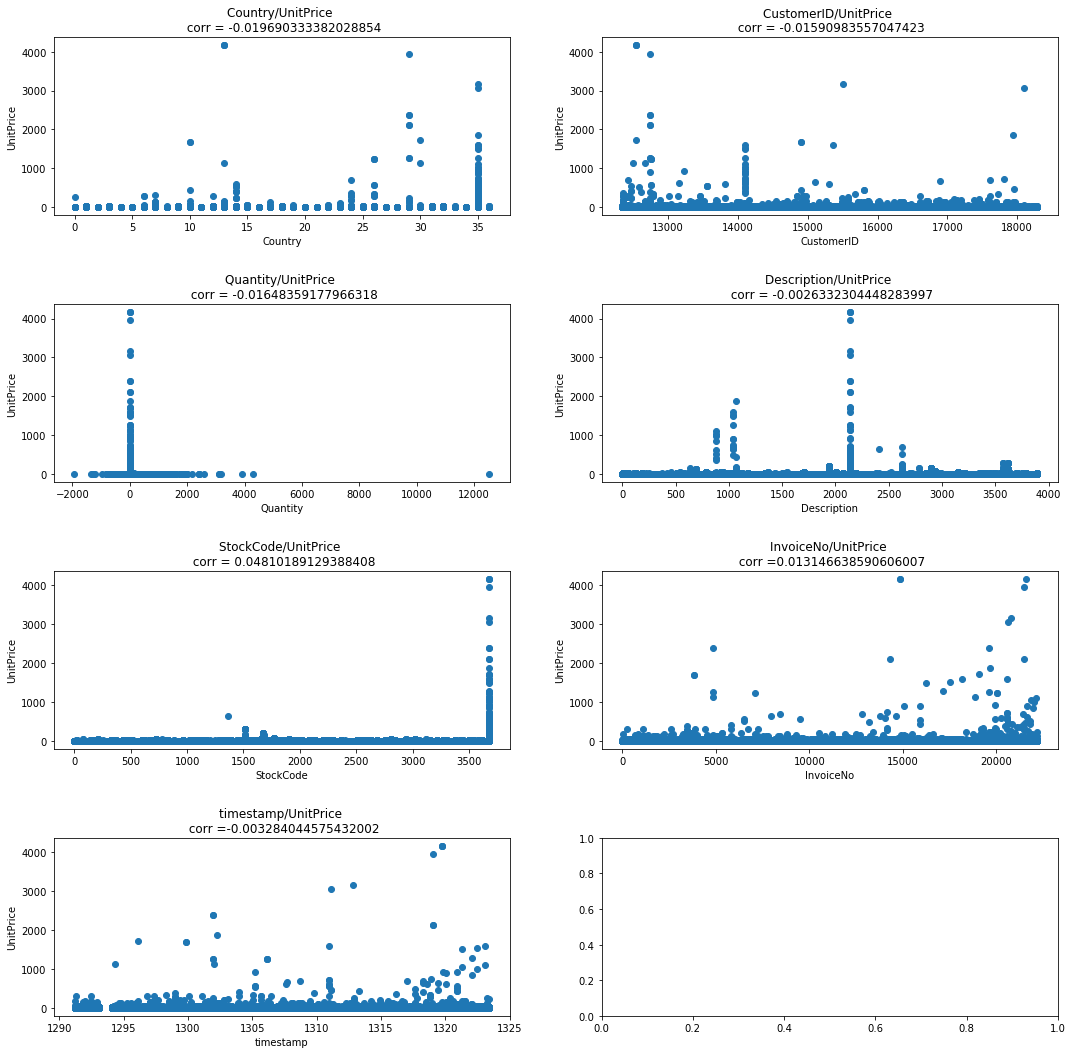

In [12]:
# plot scatter diagrams of all other variables in realtion with unitPrice to find out any outliers
fig, axs = plt.subplots(4, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)

# Plot for Country vs UnitPrice
axs[0, 0].scatter(train_data["Country"], train_data["UnitPrice"])
axs[0, 0].set_title('Country/UnitPrice \n corr = {}'.format(pearsonr(train_data["Country"],train_data["UnitPrice"])[0]))
axs[0, 0].set(xlabel='Country', ylabel='UnitPrice')

# Plot for CustomerID vs UnitPrice
axs[0, 1].scatter(train_data["CustomerID"], train_data["UnitPrice"])
axs[0, 1].set_title('CustomerID/UnitPrice \n corr = {}'.format(pearsonr(train_data["CustomerID"],train_data["UnitPrice"])[0]))
axs[0, 1].set(xlabel='CustomerID', ylabel='UnitPrice')

# Plot for Quantity vs UnitPrice
axs[1, 0].scatter(train_data["Quantity"], train_data["UnitPrice"])
axs[1, 0].set_title('Quantity/UnitPrice \n corr = {}'.format(pearsonr(train_data["Quantity"],train_data["UnitPrice"])[0]))
axs[1, 0].set(xlabel='Quantity', ylabel='UnitPrice')

# Plot for Discription vs UnitPrice
axs[1, 1].scatter(train_data["Description"], train_data["UnitPrice"])
axs[1, 1].set_title('Description/UnitPrice \n corr = {}'.format(pearsonr(train_data["Description"],train_data["UnitPrice"])[0]))
axs[1, 1].set(xlabel='Description', ylabel='UnitPrice')

# Plot for StockCode vs UnitPrice
axs[2, 0].scatter(train_data["StockCode"], train_data["UnitPrice"])
axs[2, 0].set_title('StockCode/UnitPrice \n corr = {}'.format(pearsonr(train_data["StockCode"],train_data["UnitPrice"])[0]))
axs[2, 0].set(xlabel='StockCode', ylabel='UnitPrice')
#axs[2, 0].set_ylim([0, 50])

# Plot for InvoiceNo vs UnitPrice
axs[2, 1].scatter(train_data["InvoiceNo"], train_data["UnitPrice"])
axs[2, 1].set_title('InvoiceNo/UnitPrice \n corr ={}'.format(pearsonr(train_data["InvoiceNo"],train_data["UnitPrice"])[0]))
axs[2, 1].set(xlabel='InvoiceNo', ylabel='UnitPrice')

# Plot for timestamp vs UnitPrice
axs[3, 0].scatter(train_data["timestamp"], train_data["UnitPrice"])
axs[3, 0].set_title('timestamp/UnitPrice \n corr ={}'.format(pearsonr(train_data["timestamp"],train_data["UnitPrice"])[0]))
axs[3, 0].set(xlabel='timestamp', ylabel='UnitPrice')

## Comparing the correlations before and after data cleaning
Run following cell to view before and after data cleaning correlation

In [13]:
# saving Correlation for later comparision
print("Correlation of UnitPrice before and after data cleaning")
correlation_after = train_data.corrwith(train_data["UnitPrice"],method='pearson').to_frame()
correlations["correlation with UnitPrice after"] = correlation_after

# Sorting table
correlations["temp"]=correlation_after.abs()
correlations = correlations.sort_values("temp",ascending=False)
correlations.drop(columns=["temp"], inplace=True)
correlations.style

Correlation of UnitPrice before and after data cleaning


,correlation with UnitPrice Before,correlation with UnitPrice after
UnitPrice,1.000000,1.000000
StockCode,0.020073,0.048102
Country,-0.005378,-0.019690
Quantity,-0.000924,-0.016484
CustomerID,-0.004932,-0.015910
InvoiceNo,0.007927,0.013147
timestamp,-0.001699,-0.003284
Description,-0.000424,-0.002633


* great! now correlation is much improved by almost double and more in some cases
* Do note that negative sign indicate that the two variables are inversely proportional
* correlation with country which is -0.019690 is actually higher than -0.003284 which is correlation with timestamp, Even though mathematically speaking later number is bigger that first.
* Table above is sorted from high correlation to lowest desendingly

In [14]:
train_data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
count,284774.000000,284774.000000,284774.000000,284774.000000,284774.000000,284774.000000,284774.000000,284774.000000
mean,9955.246922,1573.363169,2023.951070,12.028728,3.285828,15288.234877,32.823801,1310.330386
std,5551.396714,843.591744,1089.822655,48.343149,24.125034,1714.333512,6.743665,9.748467
min,0.000000,0.000000,0.000000,-1930.000000,0.000000,12347.000000,0.000000,1291.191960
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000,1302.174960
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,1312.114080
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,1319.118840
max,22188.000000,3683.000000,3895.000000,12540.000000,4161.060000,18287.000000,36.000000,1323.435000


In [15]:
train_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'timestamp'],
      dtype='object')

* So, my cleaned data is ready. exporting it to csv to use for model training

In [16]:
train_data.to_csv("Train_cleaned.csv")